Dataset: https://www.kaggle.com/datasets/luisandresgarcia/stock-market-prediction?resource=download



In [18]:
# Importing required packages/tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_original = pd.read_csv('/content/infolimpioavanzadoTarget.csv')

# Info and description about our data
print("Dataset Information: \n")
print(df_original.info())

print("Dataset Description: \n")
print(df_original.describe())

# Shape
print("Dataset Shape: \n")
print(df_original.shape)

# Data types
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("Dataset Datatypes: \n")
print(df_original.dtypes)

# Missing data
missing_data_original = df_original.isnull().sum()
print("Missing Data: \n")
print(missing_data_original)

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB
None
Dataset Description: 



/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: in

              open         high          low        close     adjclose  \
count  7781.000000  7781.000000  7781.000000  7781.000000  7781.000000   
mean     34.990220    35.655999    34.301243    34.964414    34.483147   
std      99.841502   101.451058    98.073945    99.790823    98.603879   
min       0.410000     0.435000     0.405000     0.408000     0.408000   
25%       4.050000     4.130000     3.980000     4.030000     3.960000   
50%      10.080000    10.110000    10.005000    10.080000    10.061000   
75%      24.350000    24.500000    24.080000    24.250000    22.466007   
max     795.739990   799.359985   784.960022   797.489990   783.376221   

             volume  RSIadjclose15  RSIvolume15  RSIadjclose25  RSIvolume25  \
count  7.781000e+03    7316.000000  7316.000000    7006.000000  7006.000000   
mean   7.586022e+05      46.817434    49.814790      46.966016    49.898659   
std    3.934491e+06      11.672838     5.002664       8.760961     3.420371   
min    0.000000e+

In [19]:
# We only want numerican features for our model
numerical_features = df_original.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation between the 'close' feature and every other (now numerical) feature
correlation_with_close = df_original[numerical_features].corr()['close'].drop('close')

correlation_with_close

,close
open,0.999660
high,0.999862
low,0.999859
adjclose,0.999965
volume,0.006285
RSIadjclose15,0.024374
RSIvolume15,-0.007675
RSIadjclose25,0.029786
RSIvolume25,0.002242
RSIadjclose50,0.031251


In [ ]:
# Filtering  the dataset
prefixes_to_keep = [
    'date', 'open', 'high', 'low', 'close', 'adjclose',
    'volume', 'ticker', 'RSI', 'MACD', 'lag', 'ema',
    'feargreed', 'sma', 'atr', 'vela',
    'mfm', 'mfv', 'adl', 'low-5', 'high-5',
    'low-10', 'high-10', 'low-15', 'high-15',
]

cols_to_drop = [
    "RSIvolume50", "MACDsig-adjclose-15",
    "MACDdif-adjclose-15-1", "MACDdif-adjclose-15-2", "MACDdif-adjclose-15-3",
    "MACDsig-volume-15", "MACDdif-volume-15-0", "MACDdif-volume-15-1",
    "MACDdif-volume-15-2", "MACDdif-volume-15-3", "MACDsig-adjclose-25",
    "MACDdif-adjclose-25-0", "MACDdif-adjclose-25-1", "MACDdif-adjclose-25-2",
    "MACDdif-adjclose-25-3", "MACDsig-volume-25", "MACDdif-volume-25-0",
    "MACDdif-volume-25-1", "MACDdif-volume-25-2", "MACDdif-volume-25-3",
    "MACDdif-adjclose-50-0", "MACDdif-adjclose-50-1",
    "MACDdif-adjclose-50-2", "MACDdif-adjclose-50-3", "MACDsig-volume-50",
    "MACDdif-volume-50-0", "MACDdif-volume-50-1", "MACDdif-volume-50-2",
    "MACDdif-volume-50-3", "MACDhistadjclose15", "MACDhistvolume15",
    "MACDhistadjclose25", "MACDhistvolume25", "MACDhistadjclose50",
    "MACDhistvolume50", "cci25", "cci40", "cci50", "RSIadjclose50", "smaadjclose50",
    "smavolume50", "mfm", "mfv", "adl", "velarelativaE", "velarelativaF",
    "lagvolume1", "lagvolume2", "lagvolume5", "lagvolume10", "lagvolume15",
    "smavolume5", "smavolume10", "smavolume15", "smavolume25", "volumenrelativo"
]

# We use a regular expression pattern for the prefixes to keep
pattern = '|'.join([f'^{prefix}' for prefix in prefixes_to_keep])

df = df_original.filter(regex=pattern).copy()

# Drop specified columns from the filtered DataFrame
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# We want to handle our dates very specifically
df['date'] = pd.to_datetime(df['date'])

# We need to drop our first month plus week
start_date = pd.to_datetime('2022-01-03')
end_date = pd.to_datetime('2022-02-08')
df = df[~((df['date'] >= start_date) & (df['date'] <= end_date))]

The dataset we used contained a lot of columns of data for candlestick pattern strategies, but we decided against using them in our model  as it outside of the scope of our goal for our model.  We also choose to drop indices that considered over 25 days in the past, as we are more interested in short term predictions. To accommodate for the indices that use under 25 days of historical data, we dropped the first month of data for each stock to not have null values in place (as the indices did not yet have the past data to calculate on).


In [ ]:
# Dataset info
print("Dataset Information: \n")
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
Index: 6975 entries, 26 to 7780
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   6975 non-null   datetime64[ns]
 1   open                   6975 non-null   float64       
 2   high                   6975 non-null   float64       
 3   low                    6975 non-null   float64       
 4   close                  6975 non-null   float64       
 5   adjclose               6975 non-null   float64       
 6   volume                 6975 non-null   int64         
 7   ticker                 6975 non-null   object        
 8   RSIadjclose15          6975 non-null   float64       
 9   RSIvolume15            6975 non-null   float64       
 10  RSIadjclose25          6975 non-null   float64       
 11  RSIvolume25            6975 non-null   float64       
 12  MACDadjclose15         6975 non-null   floa

As we can see from our output above, our updated dataset includes 55 features. These include features covering technical indicators, moving averages, volatility indicators, price range indicators, and other custom metrics. Starting off, the date feature indicates the date of each record which is used for time-series analysis. The open, high, low, and close are prices that represent the stock price movement within time intervals. Adjclose is the adjusted closing price which takes into account dividends, stock splits, and others. Volume is the number of shares traded during the time interval and ticker is the stock symbol that identifies companies or assets. Technical indicators include RSIs like RSIadjclose15, RSIvolume15, etc measure momentum by by comparing recent gains to losses over certain time periods like adjusted closes and volumes over 15 or 25 periods. MACDs like MACDadjclose15, MACDvolume15, etc are trand following momentum indicators that show the relationship between two moving avereages while MACDdif and MACDsig are difference and signal lines over multiple periods that help spot changes in trend direction. Lag indicators such as laglow1, laghigh1, etc are lagged values for the lowest and highest prices over certain time periods. Finally, feargreed is an numerical metric for representing market sentiment where high values indicate demand and low values indicate fear. Moving averages are composed of EMA and SMA. EMA are moving averages that give more weight to recent prices, highlighting recent price trends over close and volume while SMAs are averages of prices over a given period. Volatility indicators include ATRs which measure volatility by averaging the range of prices over a period of time while velaE and velaF are indicators specific to the dataset. Price range indictors such as low-5 and high-15 are the lowest and highest prices over time periods that show price movement ranges on different intervals.

In [ ]:
# Dataset description
print("Dataset Description: \n")
print(df.describe())

Dataset Description: 

                      date         open         high          low  \
count                 6975  6975.000000  6975.000000  6975.000000   
mean   2022-07-21 11:37:36    34.055212    34.707602    33.404173   
min    2022-02-09 00:00:00     0.410000     0.435000     0.405000   
25%    2022-05-02 00:00:00     3.970000     4.030000     3.905000   
50%    2022-07-22 00:00:00    10.040000    10.100000    10.000000   
75%    2022-10-11 00:00:00    24.000000    24.219999    23.799999   
max    2022-12-30 00:00:00   710.000000   714.619995   697.669983   
std                    NaN    96.660689    98.256368    95.040375   

             close     adjclose        volume  RSIadjclose15  RSIvolume15  \
count  6975.000000  6975.000000  6.975000e+03    6975.000000  6975.000000   
mean     34.044105    33.598780  7.700906e+05      47.130958    49.822377   
min       0.408000     0.408000  0.000000e+00      15.162486    39.202594   
25%       3.970000     3.870641  1.000000e+04  

The output describes the count, mean, min, 25th percentile, 50th percentile, 75th percentile, max, and std over all the data points of the features that we are taking into consideration

In [ ]:
# Dataset shape, insight into feature and observation counts
print("Dataset Shape: \n")
print(df.shape)

Dataset Shape: 

(6975, 55)


The output describes the updated dataset as a table with 6975 data entries and 55 features

In [ ]:
# Dataset datatypes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("Dataset Datatypes: \n")
print(df.dtypes)

Dataset Datatypes: 

date                     datetime64[ns]
open                            float64
high                            float64
low                             float64
close                           float64
adjclose                        float64
volume                            int64
ticker                           object
RSIadjclose15                   float64
RSIvolume15                     float64
RSIadjclose25                   float64
RSIvolume25                     float64
MACDadjclose15                  float64
MACDvolume15                    float64
MACDadjclose25                  float64
MACDvolume25                    float64
MACDadjclose50                  float64
MACDvolume50                    float64
MACDdif-adjclose-15-0           float64
MACDsig-adjclose-50             float64
laglow1                         float64
laghigh1                        float64
laglow2                         float64
laghigh2                        float64
laglow5            

The datatypes for our dataset include float64, int64, datetime64, and object where our data is represented with datatime64, ticker is represented as an object, and the remaining data is represented as a numerical value of either float64 or int64

In [ ]:
# Missing data
missing_data = df.isnull().sum()
print("Missing Data: \n")
print(missing_data)

Missing Data: 

date                        0
open                        0
high                        0
low                         0
close                       0
adjclose                    0
volume                      0
ticker                      0
RSIadjclose15               0
RSIvolume15                 0
RSIadjclose25               0
RSIvolume25                 0
MACDadjclose15              0
MACDvolume15                0
MACDadjclose25              0
MACDvolume25                0
MACDadjclose50              0
MACDvolume50                0
MACDdif-adjclose-15-0     403
MACDsig-adjclose-50      1488
laglow1                     0
laghigh1                    0
laglow2                     0
laghigh2                    0
laglow5                     0
laghigh5                    0
laglow10                    0
laghigh10                   0
laglow15                    0
laghigh15                   0
feargreed                   0
emaadjclose5                0
emavolume5              

There is almost no missing data in our dataset except for MACDdif-adjclose-15-0 and MACDsig-adjclose-50 and this is due to our prior reasoning beforehand where we removed features that had missing data and no correlation to our target value(close). Therefore, the only two features that contain missing data are the two above in which we will apply mean/median imputation to fill out the missing data.

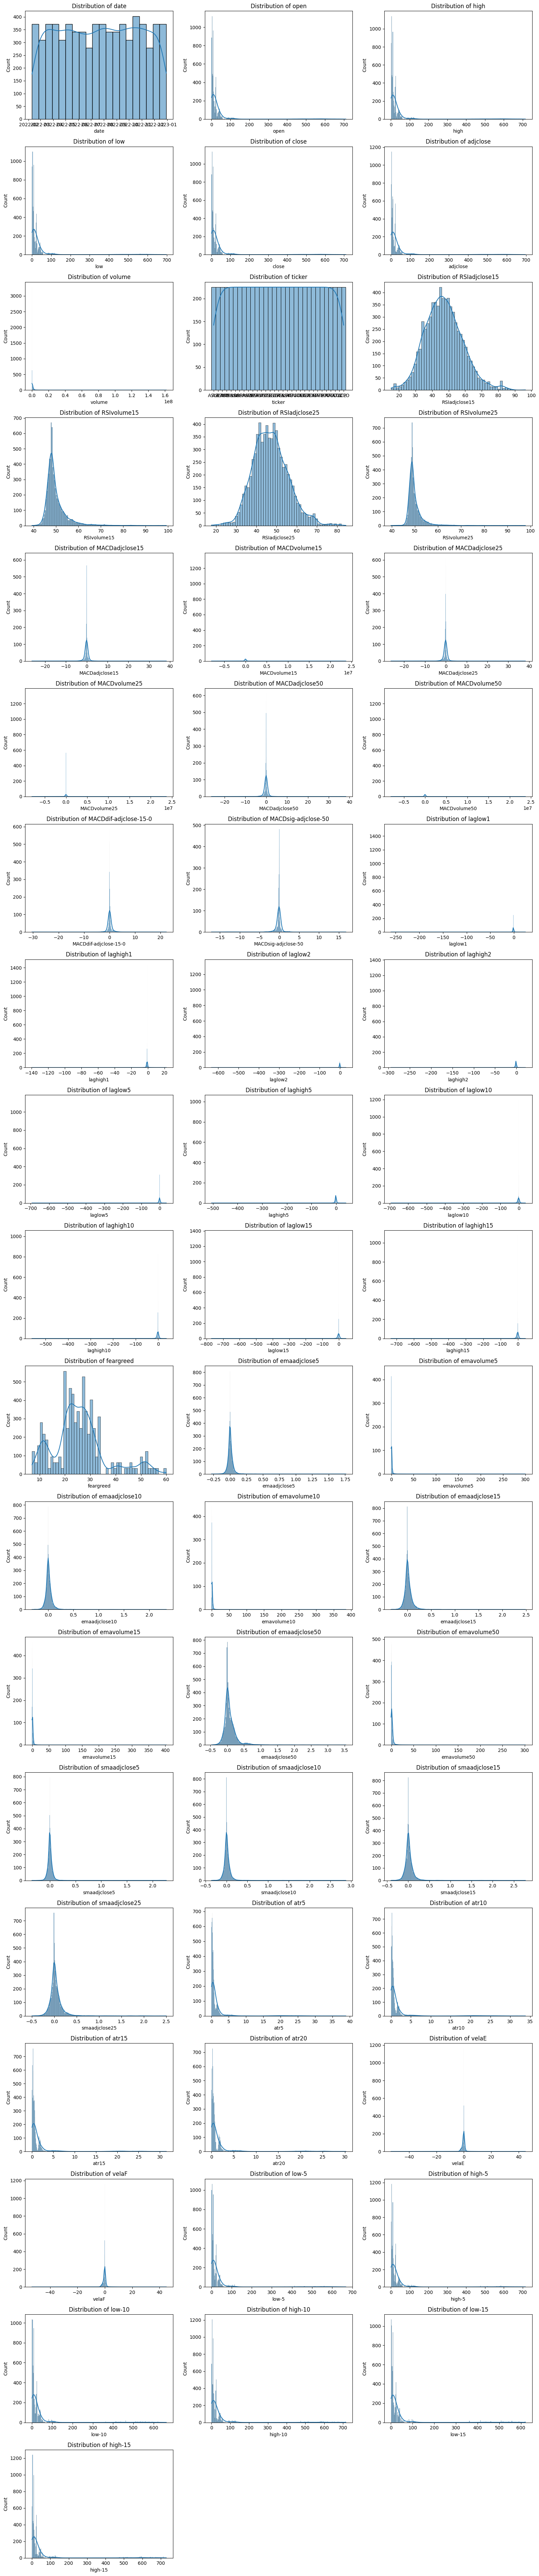

In [ ]:
# We now need to make histograms for our distributions

import matplotlib.pyplot as plt
import seaborn as sns

num_columns = len(df.columns)
num_rows = (num_columns // 3) + 1

plt.figure(figsize=(16, num_rows * 4))

# Iterate through each column(feature) in the DataFrame and plot a corresponding histogram
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


The histograms above represent the distribution of every feature in our dataset. In our preprocessing, we will examine every graph and use log transformation to compress the range and reduce skewness by applying the log function to all of the data in the features. Furthermore, we will apply min-max scaling to normalize data into a smaller range if the feature data requires a bounded range.

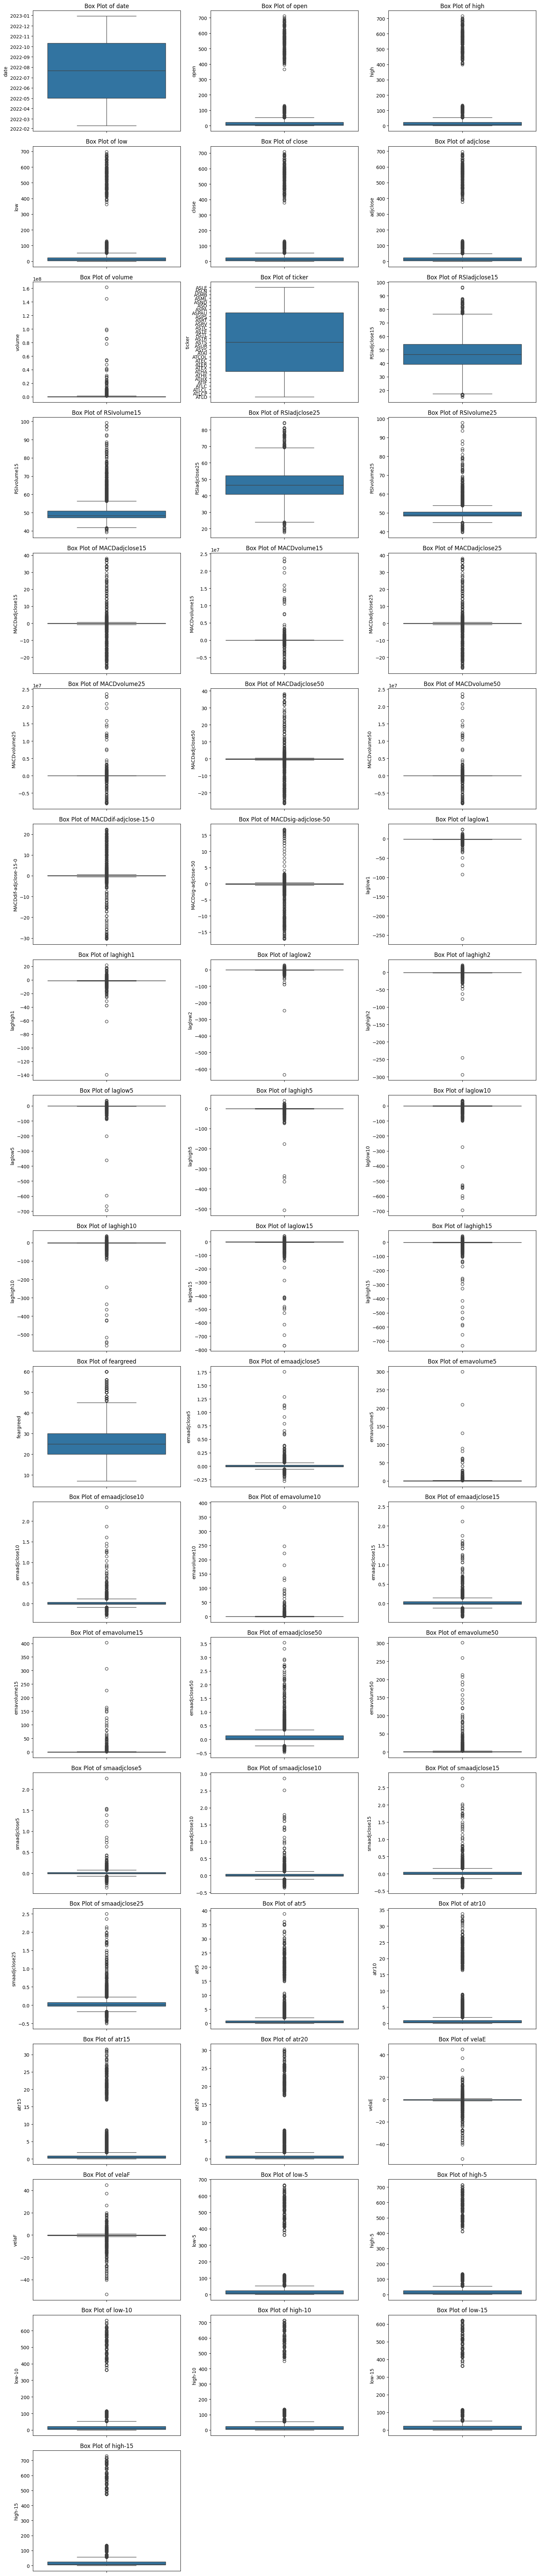

In [ ]:
# We will use a box plot to identify outliers in our data

num_columns = len(df.columns)
num_rows = (num_columns // 3) + 1

plt.figure(figsize=(16, num_rows * 4))

# Iterate through each column in our dataset and plot a corresponding box plot
for i, col in enumerate(df.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df[col].dropna())
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

Using boxplots of all the features, we can identify features with significant outliers. As we can tell from the output, almost all the features have significant outliers except for date, ticker, RSIadjclose15, RSIadjclose25, and feargreed. Since our project is going to be used to predict future close prices, we can't remove rows that have significant outliers because these are common in stock markets so we will use log transformation to mitigate the effects on our model. This means that we need to compresses the range of high values, making extreme values less prominent which we will implement by using log transformation on all the features excluding the ones listed above.

In [ ]:
# We want to use a heatmap to find correlation between features

# filter for only numerical data
df_filtered_numeric = df.select_dtypes(include=['float64', 'int']).copy()

# Plot the correlation matrix heatmap without annotations
plt.figure(figsize=(12, 10))
sns.heatmap(df_filtered_numeric.corr(), annot=False, vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

This heatmap gives us a visual representation of the correlation between the different features in our data set. This will give us insight into which features will be the most useful in generating our model, as we are most interested in the features that have high correlation to the 'close' feature, which represents the closing price of the stocks we want to predict.

In [20]:
df_filtered_numeric.corr()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,MACDadjclose15,MACDvolume15,MACDadjclose25,MACDvolume25,MACDadjclose50,MACDvolume50,MACDdif-adjclose-15-0,MACDsig-adjclose-50,laglow1,laghigh1,laglow2,laghigh2,laglow5,laghigh5,laglow10,laghigh10,laglow15,laghigh15,feargreed,emaadjclose5,emavolume5,emaadjclose10,emavolume10,emaadjclose15,emavolume15,emaadjclose50,emavolume50,smaadjclose5,smaadjclose10,smaadjclose15,smaadjclose25,atr5,atr10,atr15,atr20,velaE,velaF,low-5,high-5,low-10,high-10,low-15,high-15
open,1.000000,0.999870,0.999882,0.999671,0.999632,0.003872,0.034755,-0.007044,0.029327,0.001446,-0.110410,-0.000173,-0.110410,-0.000173,-0.110410,-0.000173,0.145374,-0.367126,0.014405,0.018680,0.014965,0.020067,0.022713,0.027147,0.031947,0.033626,0.039439,0.039351,0.022038,-0.027471,-0.024054,-0.040365,-0.026172,-0.049945,-0.027806,-0.075474,-0.039382,-0.021731,-0.033424,-0.042574,-0.057132,0.972676,0.981751,0.984743,0.985769,-0.376725,-0.376725,0.999177,0.999266,0.997768,0.998461,0.996313,0.997955
high,0.999870,1.000000,0.999874,0.999875,0.999843,0.004516,0.035495,-0.004968,0.029681,0.003676,-0.112298,0.000224,-0.112298,0.000224,-0.112298,0.000224,0.148261,-0.369993,0.014498,0.018977,0.015024,0.020228,0.022754,0.027248,0.031992,0.033711,0.039489,0.039435,0.021639,-0.029064,-0.024325,-0.041486,-0.026470,-0.050798,-0.028121,-0.075643,-0.039762,-0.023318,-0.034495,-0.043365,-0.057615,0.973896,0.982644,0.985491,0.986435,-0.365049,-0.365049,0.999034,0.999277,0.997590,0.998502,0.996182,0.997999
low,0.999882,0.999874,1.000000,0.999862,0.999821,0.003593,0.036318,-0.008371,0.030744,0.000184,-0.108415,-0.000365,-0.108415,-0.000365,-0.108415,-0.000365,0.144339,-0.366951,0.014611,0.018813,0.015077,0.020125,0.022766,0.027157,0.031964,0.033608,0.039438,0.039320,0.022006,-0.029175,-0.023800,-0.041733,-0.025895,-0.051154,-0.027513,-0.076241,-0.039025,-0.023376,-0.034668,-0.043640,-0.058075,0.971652,0.981039,0.984124,0.985198,-0.366200,-0.366200,0.999155,0.999134,0.997642,0.998322,0.996136,0.997793
close,0.999671,0.999875,0.999862,1.000000,0.999968,0.004190,0.037330,-0.006250,0.031395,0.002382,-0.109276,-0.000019,-0.109276,-0.000019,-0.109276,-0.000019,0.146423,-0.368984,0.014627,0.018975,0.015089,0.020212,0.022774,0.027209,0.031978,0.033654,0.039454,0.039363,0.021561,-0.030768,-0.024063,-0.042881,-0.026180,-0.052055,-0.027814,-0.076481,-0.039386,-0.024932,-0.035752,-0.044473,-0.058629,0.972789,0.981810,0.984737,0.985722,-0.353904,-0.353904,0.998891,0.999029,0.997316,0.998216,0.995845,0.997673
adjclose,0.999632,0.999843,0.999821,0.999968,1.000000,0.004454,0.037623,-0.006259,0.031788,0.002383,-0.107482,-0.000017,-0.107482,-0.000017,-0.107482,-0.000017,0.144618,-0.367411,0.014586,0.018921,0.015047,0.020155,0.022711,0.027133,0.031890,0.033561,0.039346,0.039255,0.021216,-0.030682,-0.024167,-0.042770,-0.026268,-0.051928,-0.027898,-0.076234,-0.039466,-0.024860,-0.035652,-0.044357,-0.058501,0.973038,0.982057,0.985003,0.986030,-0.351442,-0.351442,0.998830,0.999005,0.997218,0.998199,0.995704,0.997657
volume,0.003872,0.004516,0.003593,0.004190,0.004454,1.000000,0.041858,0.213556,0.037600,0.269305,0.003369,0.662149,0.003369,0.662149,0.003369,0.662149,0.001088,-0.015272,-0.046824,-0.010806,-0.048200,-0.025547,-0.049857,-0.033517,-0.044118,-0.029492,-0.043205,-0.028607,0.018502,-0.017011,-0.021249,-0.016799,-0.022954,-0.014291,-0.024263,0.022680,-0.032584,-0.014003,-0.014349,-0.018527,-0.015185,0.019436,0.015733,0.013986,0.012949,0.018473,0.018473,0.002558,0.004878,0.002059,0.004889,0.001857,0.004883
RSIadjclose15,0.034755,0.035495,0.036318,0.037330,0.037623,0.041858,1.000000,0.022393,0.963770,0.035450,0.253474,0.082276,0.253474,0.082276,0.253474,0.082276,-0.174594,0.097270,0.109525,0.142666,0.106995,0.142938,0.147317,0.176388,0.188990,0.197386,0.216904,0.213809,0.202767,-0.437608,0.055167,-0.539112,0.066104,-0.594231,0.068497,-0.586488,0.074410,-0.373350,-0.483149,-0.549413,-0.626202,0.009507,0.008207,0.005971,0.004

This table essentially serves the same purpose of our heatmap as it cross checks the correlation between all the different features. However, it is most specific as it provides the actual numerical data associated with the corelation between features on a -1 to 1 scale. We can use this similarly to the heatmap to see which features are most correlated to the 'close' price that we aim to predict with our model.

In [ ]:
# Pairplot
sns.pairplot(df)
plt.show()

The pairplots between features, while extensive, are useful in helping us analyze trends, correlation, and outliers in our data. We can see the relationship between different features visually which can help inform our model which will ultimately use these features to make its predictions. This will help us select features that will positiely contribute to the predictive accuracy of our model and will also help inform us of transformations that we may need to make to the data before we use it.

**Use of external tools**: While the written code is produced by our group, we used chatgpt and stack overflow. This includes things like writing regular expressions, learning how to filter for numerical data only, process dates with Pandas, using it to analyze and explain feature details, and searching for very specific methods that we did not frequently use when working with Python.